In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
## Data set:
## http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html

In [2]:
columns = ['duration','protocol_type','service','flag','src_bytes',
          'dst_bytes','land','wrong_fragment','urgent','hot',
           'num_falied_logins','logged_in','num_compromised',
          'root_shell','su_attempted','num_root','num_file_creations',
          'num_shells','num_access_files','num_outbound_cmds',
          'is_host_login','is_guest_login','count','srv_count',
           'serror_rate','srv_serror_rate','rerror_rate',
          'srcv_rerror_rate','same_srv_rate','diff_srv_rate',
          'srv_diff_host_rate','dst_host_count','dst_host_srv_count',
          'dst_host_same_srv_rate','dst_host_diff_srv_rate',
          'dst_host_same_src_port_rate','dst_host_srv_diff_host_rate',
          'dst_host_serror_rate','dst_host_srv_serror_rate',
          'dst_host_rerror_rate','dst_host_srv_rerror_rate',
          'label']
df = pd.read_csv('kddcup.data.corrected',sep =',',names=columns,
                index_col=None)

In [4]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


In [5]:
df.shape

(4898431, 42)

In [ ]:
## We have 42 features

In [7]:
df['service'].unique()

array(['http', 'smtp', 'domain_u', 'auth', 'finger', 'telnet', 'eco_i',
       'ftp', 'ntp_u', 'ecr_i', 'other', 'urp_i', 'private', 'pop_3',
       'ftp_data', 'netstat', 'daytime', 'ssh', 'echo', 'time', 'name',
       'whois', 'domain', 'mtp', 'gopher', 'remote_job', 'rje', 'ctf',
       'supdup', 'link', 'systat', 'discard', 'X11', 'shell', 'login',
       'imap4', 'nntp', 'uucp', 'pm_dump', 'IRC', 'Z39_50', 'netbios_dgm',
       'ldap', 'sunrpc', 'courier', 'exec', 'bgp', 'csnet_ns', 'http_443',
       'klogin', 'printer', 'netbios_ssn', 'pop_2', 'nnsp', 'efs',
       'hostnames', 'uucp_path', 'sql_net', 'vmnet', 'iso_tsap',
       'netbios_ns', 'kshell', 'urh_i', 'http_2784', 'harvest', 'aol',
       'tftp_u', 'http_8001', 'tim_i', 'red_i'], dtype=object)

In [ ]:
## We will focus on 'http' service

In [10]:
df = df[df['service'] == 'http']
df = df.drop('service',axis = 1)
columns.remove('service')

In [12]:
df.shape

(623091, 41)

In [14]:
df['label'].value_counts()

normal.       619046
back.           2203
neptune.        1801
portsweep.        16
ipsweep.          13
satan.             7
phf.               4
nmap.              1
Name: label, dtype: int64

In [ ]:
## We apply Label Encoder for categorical data

In [16]:
encoder = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        encoder.fit(df[col])
        df[col] = encoder.transform(df[col])

In [21]:
## We randomly shuffle all entries:

In [19]:
for f in range (0,3):
    df=df.iloc[np.random.permutation(len(df))]

In [ ]:
## We create our training, partition and validation sets:

In [23]:
df2 = df[:500000]
X = df2 ## note, we want anomaly scores, not ML training
y = df2['label']
df_val = df[500000:]
X_val = df_val
y_val = df_val['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
## We now instantiate our isolation forest

In [28]:
isolation_forest = IsolationForest(random_state=42)

In [29]:
isolation_forest.fit(X_train) # we train our model 

/Users/aldodector/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/Users/aldodector/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


IsolationForest(behaviour='old', bootstrap=False, contamination='legacy',
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=42, verbose=0, warm_start=False)

In [30]:
anomaly_scores = isolation_forest.decision_function(X_val)

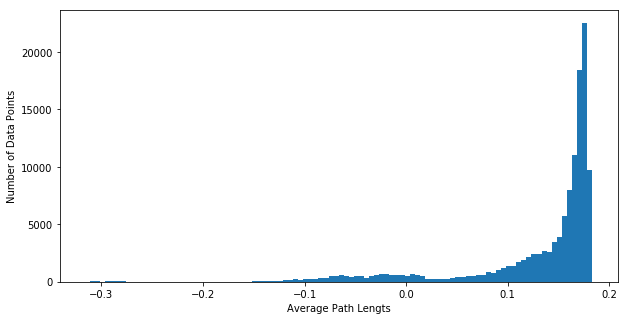

In [34]:
plt.figure(figsize=(10,5))
plt.hist(anomaly_scores,bins = 100)
plt.xlabel('Average Path Lengts')
plt.ylabel('Number of Data Points')
plt.show()

In [35]:
## So, we get a histogram plotting the average path lengths  for the data points.
## It helps to determine what is an anomaly by using the shortest et f path lengths
## ince that indicates that the model as able to easily isolate those points.

In [ ]:
## We chose determine anomalies as those with average path lengths < -0.19.
## We compute AUC, comparing our non-anomalous data to actual normal datato see how well the model did:

In [36]:
from sklearn.metrics import roc_auc_score

In [42]:
non_anomalies = anomaly_scores > -0.19

In [43]:
normal = (y_val == list(encoder.classes_).index('normal.'))

In [44]:
auc = roc_auc_score(non_anomalies,normal)

In [45]:
print(auc) 

0.983033803208422


In [ ]:
## Very good score. We might be overfitting. We now check on the test set

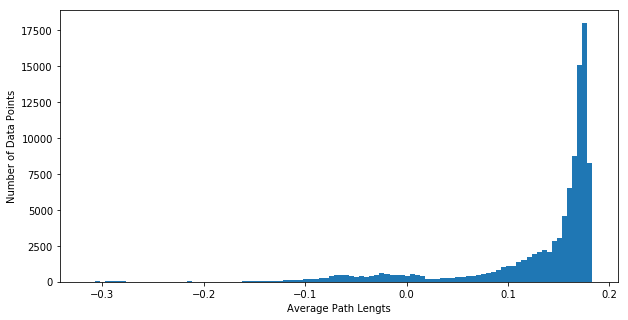

In [46]:
anomaly_scores_test = isolation_forest.decision_function(X_test)
plt.figure(figsize=(10,5))
plt.hist(anomaly_scores_test,bins = 100)
plt.xlabel('Average Path Lengts')
plt.ylabel('Number of Data Points')
plt.show()

In [ ]:
## We see a similar pattern.
## We compute the AUC for the test set.

In [47]:
non_anomalies_test = anomaly_scores_test > -0.19
normal_test = (y_test == list(encoder.classes_).index('normal.'))
auc_test = roc_auc_score(non_anomalies_test,normal_test)
print(auc_test) 

0.98638861634414


In [ ]:
## So the model performs well. 